# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /Users/KyleBreda
[nltk_data]     1/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api_key")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q = "bitcoin", language = "en")
btc_news["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Khari Johnson',
 'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
 'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
 'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
 'publishedAt': '2021-07-19T11:00:00Z',
 'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'}

In [7]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q = "ethereum", language = "en")
eth_news["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [35]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(Bitcoin_sentiments)


In [21]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    

eth_df = pd.DataFrame(Ethereum_sentiments)


In [22]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.008395,0.051750,0.051300,0.896950
std,0.459637,0.060961,0.091597,0.110237
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.119175,0.000000,0.000000,0.836000
50%,0.000000,0.018500,0.000000,0.910500
75%,0.255800,0.092500,0.078250,1.000000
max,0.726400,0.178000,0.287000,1.000000


In [23]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.259775,0.073250,0.012450,0.91430
std,0.311957,0.073203,0.026172,0.08092
min,-0.340000,0.000000,0.000000,0.78200
25%,0.000000,0.000000,0.000000,0.84275
50%,0.295000,0.077500,0.000000,0.92250
75%,0.528675,0.149250,0.000000,1.00000
max,0.771700,0.194000,0.072000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score at .073.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compund score.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

In [46]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[wnl.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [47]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.Text.apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, ha, r..."
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
4,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."


In [48]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.Text.apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
2,0.3400,0.105,0.000,0.895,Cryptocurrencies spiked Monday after Amazon li...,"[cryptocurrencies, spiked, monday, amazon, lis..."
3,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu...","[anthony, di, iorio, cofounder, ethereum, netw..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [53]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.tokens]
dict(btc_bigram_counts[0].most_common(10))


{('like', 'dogecoin'): 1,
 ('dogecoin', 'devotee'): 1,
 ('devotee', 'mayor'): 1,
 ('mayor', 'reno'): 1,
 ('reno', 'leader'): 1,
 ('leader', 'el'): 1,
 ('el', 'salvador'): 1,
 ('salvador', 'aldo'): 1,
 ('aldo', 'baoicchi'): 1,
 ('baoicchi', 'convinced'): 1}

In [54]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.tokens]
dict(eth_bigram_counts[0].most_common(10))

{('many', 'blockchain'): 1,
 ('blockchain', 'platform'): 1,
 ('platform', 'competing'): 1,
 ('competing', 'investor'): 1,
 ('investor', 'developer'): 1,
 ('developer', 'attention'): 1,
 ('attention', 'right'): 1,
 ('right', 'big'): 1,
 ('big', 'daddy'): 1,
 ('daddy', 'ethereum'): 1}

In [55]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [57]:
# Use token_count to get the top 10 words for Bitcoin
btcstr = []
for tokens in btc_df.tokens:
    btcstr += tokens
btc_token_count = token_count(btcstr)
btc_token_count

[('char', 20),
 ('bitcoin', 14),
 ('attack', 7),
 ('reuters', 7),
 ('illustration', 7),
 ('seen', 6),
 ('taken', 6),
 ('reutersdado', 6),
 ('virtual', 5),
 ('currency', 5)]

In [58]:
# Use token_count to get the top 10 words for Ethereum
ethstr = []
for tokens in eth_df.tokens:
    ethstr += tokens
eth_token_count = token_count(ethstr)
eth_token_count

[('char', 20),
 ('ethereum', 11),
 ('bitcoin', 10),
 ('cryptocurrency', 7),
 ('network', 5),
 ('cryptocurrencies', 4),
 ('world', 4),
 ('ha', 4),
 ('illustration', 4),
 ('blockchain', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

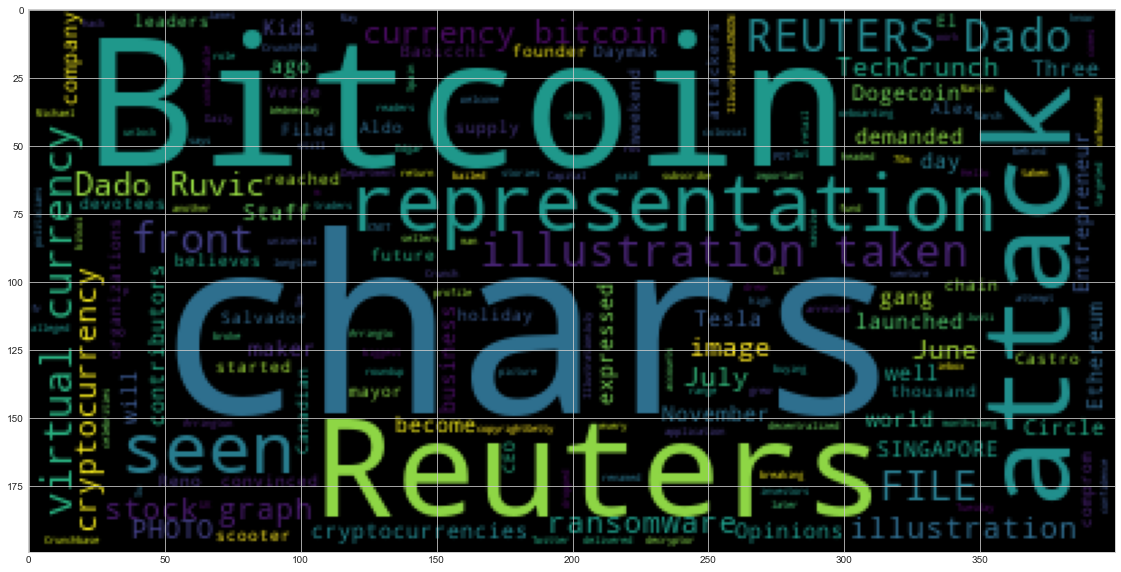

In [61]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join(btc_df['Text'])


btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

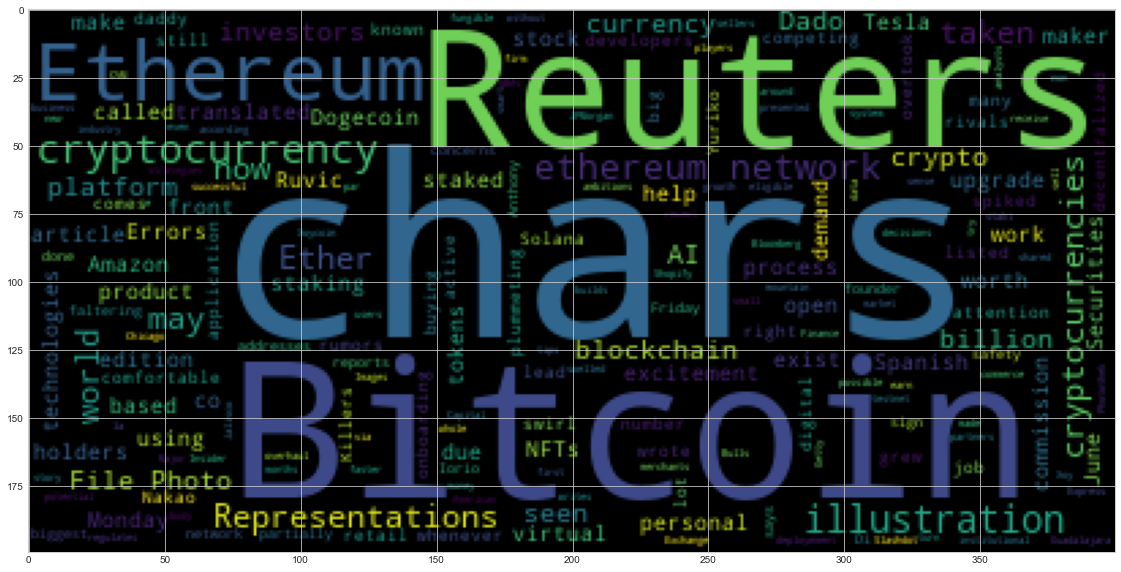

In [62]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(eth_df['Text'])


eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [65]:
import spacy
from spacy import displacy

In [66]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [67]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [68]:
# Concatenate all of the Bitcoin text together
btc_big_string

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized applica

In [69]:
# Run the NER processor on all of the text
bitcoin = nlp(btc_big_string)

# Add a title to the document
bitcoin.user_data['title'] = 'Bitcoin NER'

In [70]:
# Render the visualization
displacy.render(bitcoin, style = 'ent')

In [71]:
# List all Entities
print(bitcoin.ents)

(Reno, El Salvador, Aldo Baoicchi, Canadian, Daymak, Alex Castro, The Verge, Three days, the holiday weekend, copyrightGetty Images, $70m, £50.5m, every day, 3 p.m. PDT, Daily Crunch, July 23, 2021, Bitcoin and Ethereum, 2021, Michael Arrington, TechCrunch, Crunchbase, CrunchFund, Tuesday, 2017, SINGAPORE, July 28, Reuters, 40,000, Wednesday, March 15, 2021, REUTERS, Dado Ruvic/, June 30, Reuters, Reuters, FILE, June 7, 2021, REUTERS, Edgar Su/Illustration/File Photo, Reuters, +304, James Martin/CNET, UK, Spain, Twitter, 2020, the US Department of Justi, May 19, 2021, REUTERS, Dado Ruvic, Reuters, 5.17%, 33, November 19, 2020, REUTERS, Dado Ruvic/IllustrationSINGAPORE, July 21, Reuters, Reuters, FILE, November 19, 2020, REUTERS, Dado Ruvic/Illustration
SINGAPORE, June 29, 2021, REUTERS, Dado Ruvic, Ju, Entrepreneur, Crypto Kids Camp, Los Angeles, CNBC, 26, five to 17, Entrepreneur, first, more than three decades ago, six months ago, dozens, February 9, 2021, REUTERS, Dado, Reuters, Tes

---

### Ethereum NER

In [72]:
# Concatenate all of the Ethereum text together
eth_big_string

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] Cryptocurrencies spiked Monday after Amazon listed an open job for a digital currency and blockchain product lead.\xa0\r\nAmazon is known for plummeting the stocks of would-be rivals whenever rumors swirl… [+1425 chars] Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars] "Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of pers

In [73]:
# Run the NER processor on all of the text
ethereum = nlp(eth_big_string)

# Add a title to the document
ethereum.user_data['title'] = 'Ethereum NER'

In [74]:
# Render the visualization
displacy.render(ethereum, style = 'ent')

In [75]:
# List all Entities
print(ethereum.ents)

(Ethereum, Ethereum Killers, Solana, Bitcoin and Ethereum, 2021, Monday, Amazon, Amazon, Yuriko Nakao, Friday, Anthony Di Iorio, Ethereum, Bloomberg, Slashdot, more than $13 billion, 2.0, Photothek, more than $13 billion, 2.0, Spanish, AI, Xoy Capital, Guadalajara, Jalisco, Xoycoin, $40 billion, 2025, JPMorgan, recent months, Monday, Chicago Bulls, American Express, Spanish, AI, The Securities and Exchange Commission, London, Ethereum, 12 965 000, August 3-5, 2021, Clie, Reuters, FILE, June 7, 2021, REUTERS, Edgar Su/Illustration/File Photo, Reuters, +304, Hackaday, Proof of Work, Bitcoin, Ethereum, May 19, 2021, REUTERS, Dado Ruvic, Reuters, 5.17%, 33, Polygon, $100 million, June 29, 2021, REUTERS, Dado Ruvic/Illustration/File Photo, February 9, 2021, REUTERS, Dado, Reuters, Tesla Inc)


---